In [1]:
import pickle
from scipy import sparse
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
import spektral
import os
import tensorflow as tf
import pandas
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import keras_tuner as kt
from scipy.optimize import curve_fit
from scipy.interpolate import make_interp_spline, BSpline
import pandas as pd
import openpyxl

In [22]:
batch = pd.read_excel(r"C:\Users\buing\Documents\CBE 424\membrane\all pts.xlsx")
print(batch)
print(batch["J_per (mmol/s).2"])

    feed P (psig)  Feed Rot (mm)  feed flow (sccm)  Per. P (psig)  \
0            22.0           54.0      15337.311066            0.0   
1            22.0           60.5      17183.468880            0.0   
2            23.0           57.0      16189.383903            0.0   
3            69.5            6.0       1703.134109            0.0   
4            69.0            7.0       1986.989794            0.0   
5            68.0            7.5       2128.917637            0.0   
6            83.0            7.0       1986.989794            0.0   
7            37.0           66.0      18745.602414            0.0   
8            36.0           78.0      22153.893762            0.0   
9            37.0           66.0      18745.602414            0.0   
10           69.0            8.0       2270.845479            0.0   
11           83.0            7.2       2043.760931            0.0   
12           82.0            7.5       2128.917637            0.0   
13           68.0           11.5  

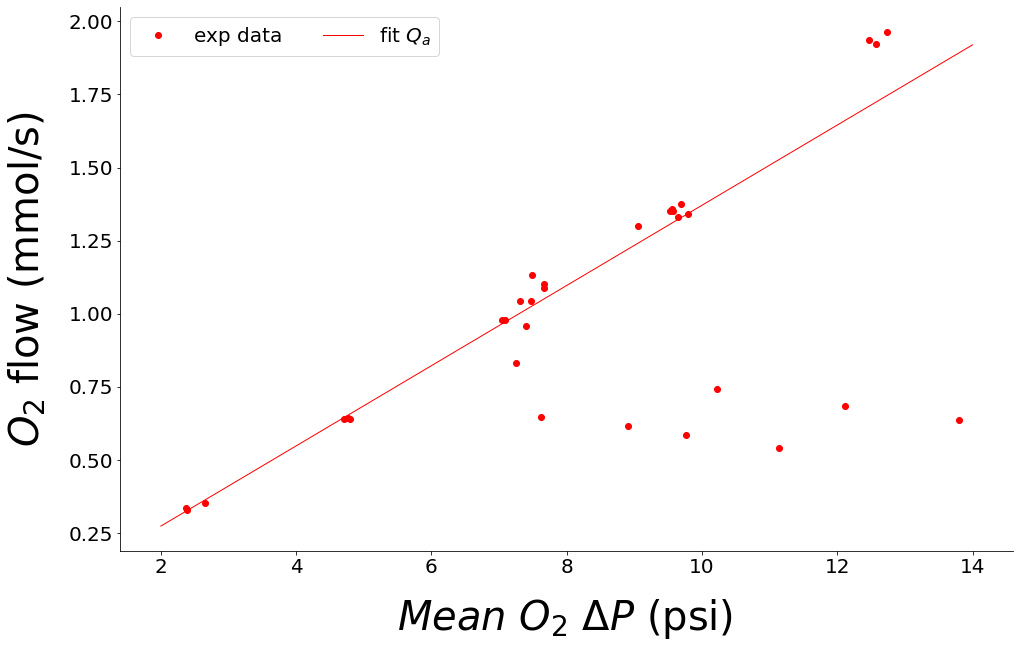

In [34]:
fig, ax1 = plt.subplots(figsize = (16, 10))
#total flux at permeate
n = 1
lw = 6
x = np.linspace(2,14,50)
y = 0.1371*x
ax1.plot(batch["delta P"],batch["J_per (mmol/s).1"],'ro', markersize = lw,label = "exp data")
ax1.plot(x,y,'r-', linewidth = 1,label = "fit $Q_a$")
#ax1.plot(x,y,'r-', linewidth = 4,label = "linear fit")
#ax2.plot(batch["feed flow (sccm)"],batch["N2 (ret)"],'bo', markersize = lw)


#plt.plot(t_int,f1,'r-', linewidth = 1, label = "model 1")
#plt.plot(t_int,f2,'b-',linewidth = 1,label = "model 2")
#plt.plot(t_int,f3,'g-',linewidth = 1, label = "model 3")

legend = plt.legend(ncol = 2, loc = 'best', fontsize = 20)
ax1.set_ylabel(r"$ O_2$ flow (mmol/s)", fontsize = 40,labelpad=20)
#ax2.set_ylabel(r" N2% recovery", fontsize = 20, labelpad = 20, color = 'b')
ax1.set_xlabel(r"$ Mean$ $ O_2$ $ \Delta P$ (psi) ",fontsize = 40,labelpad=20)
ax1.tick_params(axis='both', which='major', labelsize=20)
#ax2.tick_params(axis='both', which='major', labelsize=20)
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')

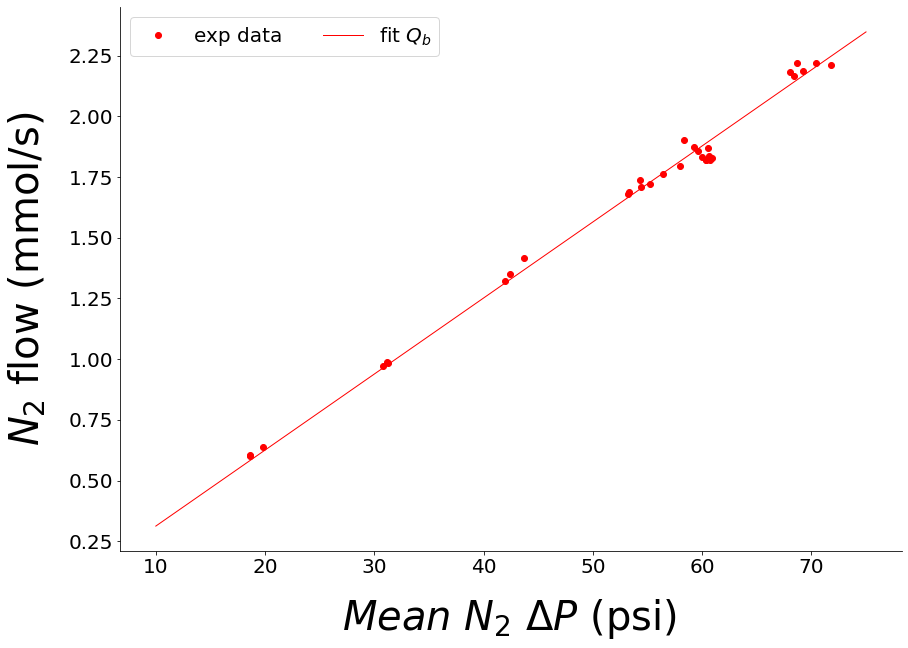

In [35]:
fig, ax1 = plt.subplots(figsize = (14, 10))
#total flux at permeate
n = 1
lw = 6
x = np.linspace(10,75,50)
y = 0.0313*x
ax1.plot(batch["delta P.1"],batch["J_per (mmol/s).2"],'ro', markersize = lw,label = "exp data")
ax1.plot(x,y,'r-', linewidth = 1,label = "fit $Q_b$")
#ax1.plot(x,y,'r-', linewidth = 4,label = "linear fit")
#ax2.plot(batch["feed flow (sccm)"],batch["N2 (ret)"],'bo', markersize = lw)


#plt.plot(t_int,f1,'r-', linewidth = 1, label = "model 1")
#plt.plot(t_int,f2,'b-',linewidth = 1,label = "model 2")
#plt.plot(t_int,f3,'g-',linewidth = 1, label = "model 3")

legend = plt.legend(ncol = 2, loc = 'best', fontsize = 20)
ax1.set_ylabel(r"$ N_2$ flow (mmol/s)", fontsize = 40,labelpad=20)
#ax2.set_ylabel(r" N2% recovery", fontsize = 20, labelpad = 20, color = 'b')
ax1.set_xlabel(r"$ Mean$ $ N_2$ $ \Delta P$ (psi) ",fontsize = 40,labelpad=20)
ax1.tick_params(axis='both', which='major', labelsize=20)
#ax2.tick_params(axis='both', which='major', labelsize=20)
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')